In [1]:
# 導入模組
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [40]:
adata = pd.read_csv('diabetes.csv')
adata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [47]:
# 移除缺失值
adata.dropna(inplace=True)

# 檢查資料型態
adata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [41]:
# 資料分析
count = adata.groupby(["Pregnancies"],as_index=False)["Pregnancies"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["Glucose"],as_index=False)["Glucose"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["BloodPressure"],as_index=False)["BloodPressure"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["SkinThickness"],as_index=False)["SkinThickness"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["Insulin"],as_index=False)["Insulin"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["BMI"],as_index=False)["BMI"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["DiabetesPedigreeFunction"],as_index=False)["DiabetesPedigreeFunction"].agg({"cnt": "count"})
print(count)
count = adata.groupby(["Age"],as_index=False)["Age"].agg({"cnt": "count"})
print(count)


    Pregnancies  cnt
0             0  111
1             1  135
2             2  103
3             3   75
4             4   68
5             5   57
6             6   50
7             7   45
8             8   38
9             9   28
10           10   24
11           11   11
12           12    9
13           13   10
14           14    2
15           15    1
16           17    1
     Glucose  cnt
0          0    5
1         44    1
2         56    1
3         57    2
4         61    1
..       ...  ...
131      195    2
132      196    3
133      197    4
134      198    1
135      199    1

[136 rows x 2 columns]
    BloodPressure  cnt
0               0   35
1              24    1
2              30    2
3              38    1
4              40    1
5              44    4
6              46    2
7              48    5
8              50   13
9              52   11
10             54   11
11             55    2
12             56   12
13             58   21
14             60   37
15            

# 選出數值型的欄位
num_cols = [col for col in adata.columns if adata[col].dtype != 'object']

# 輸出結果
print("Numeric columns:")
print(num_cols)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<Figure size 2000x1000 with 0 Axes>

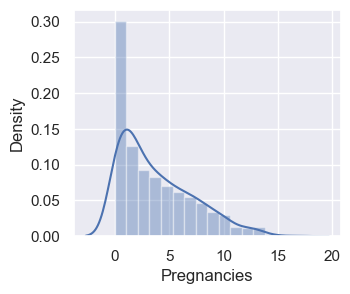

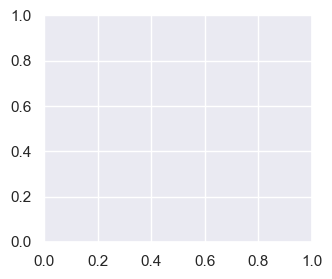

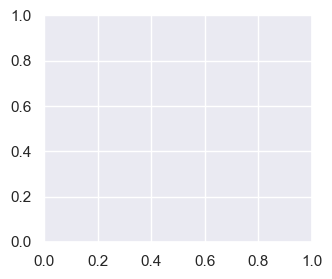

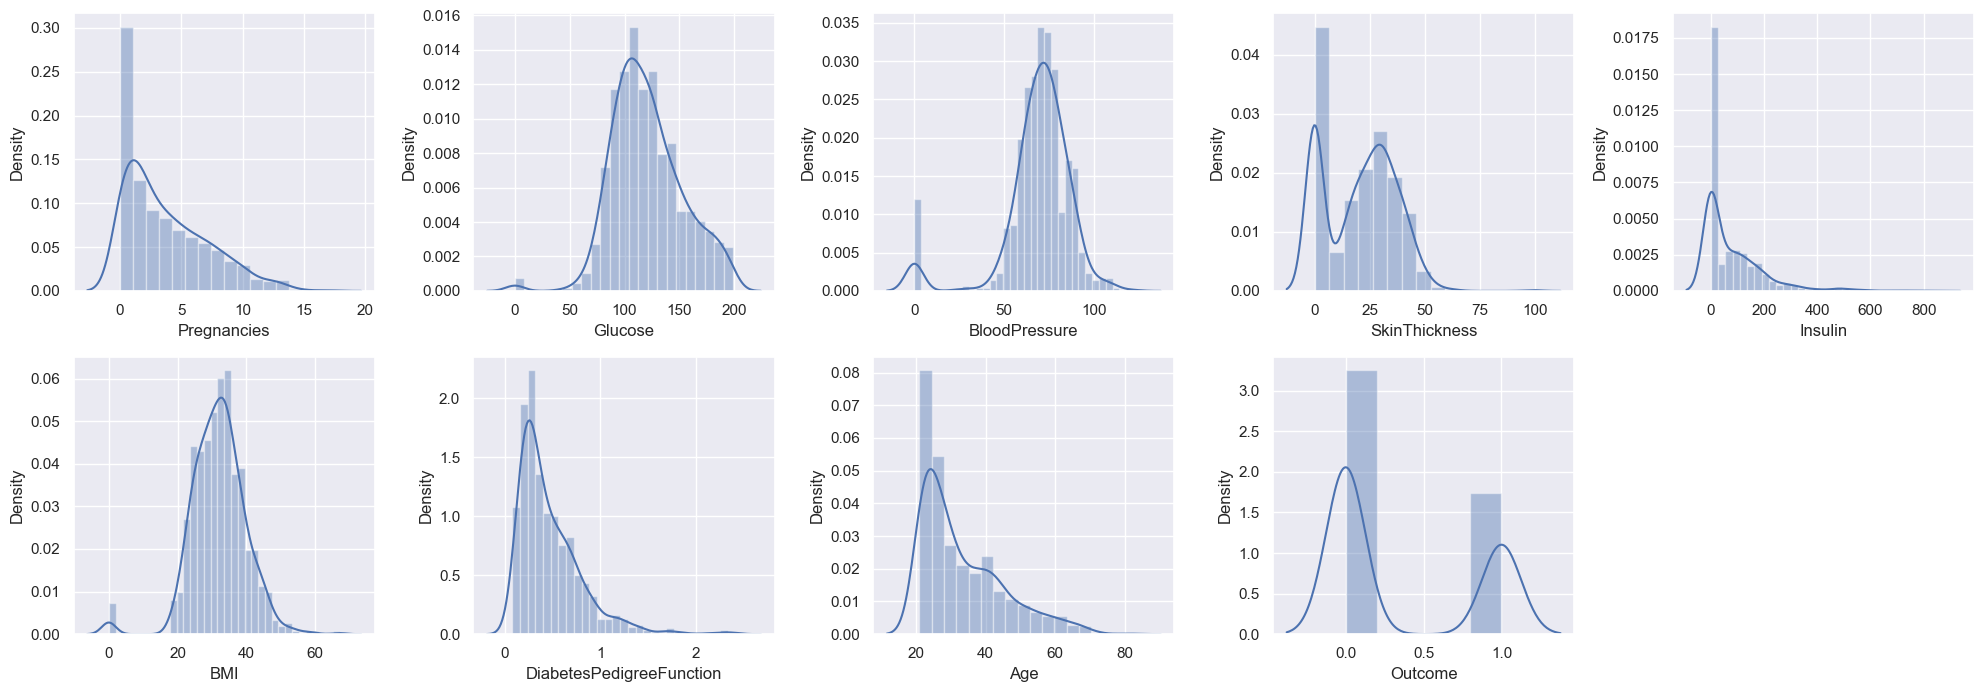

In [27]:
# 畫出直方圖
plt.figure(figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3,5, plot_number)
        sns.distplot(adata[column])
        plt.xlabel(column)
        
        plot_number += 1
        
plt.tight_layout()
plt.show()

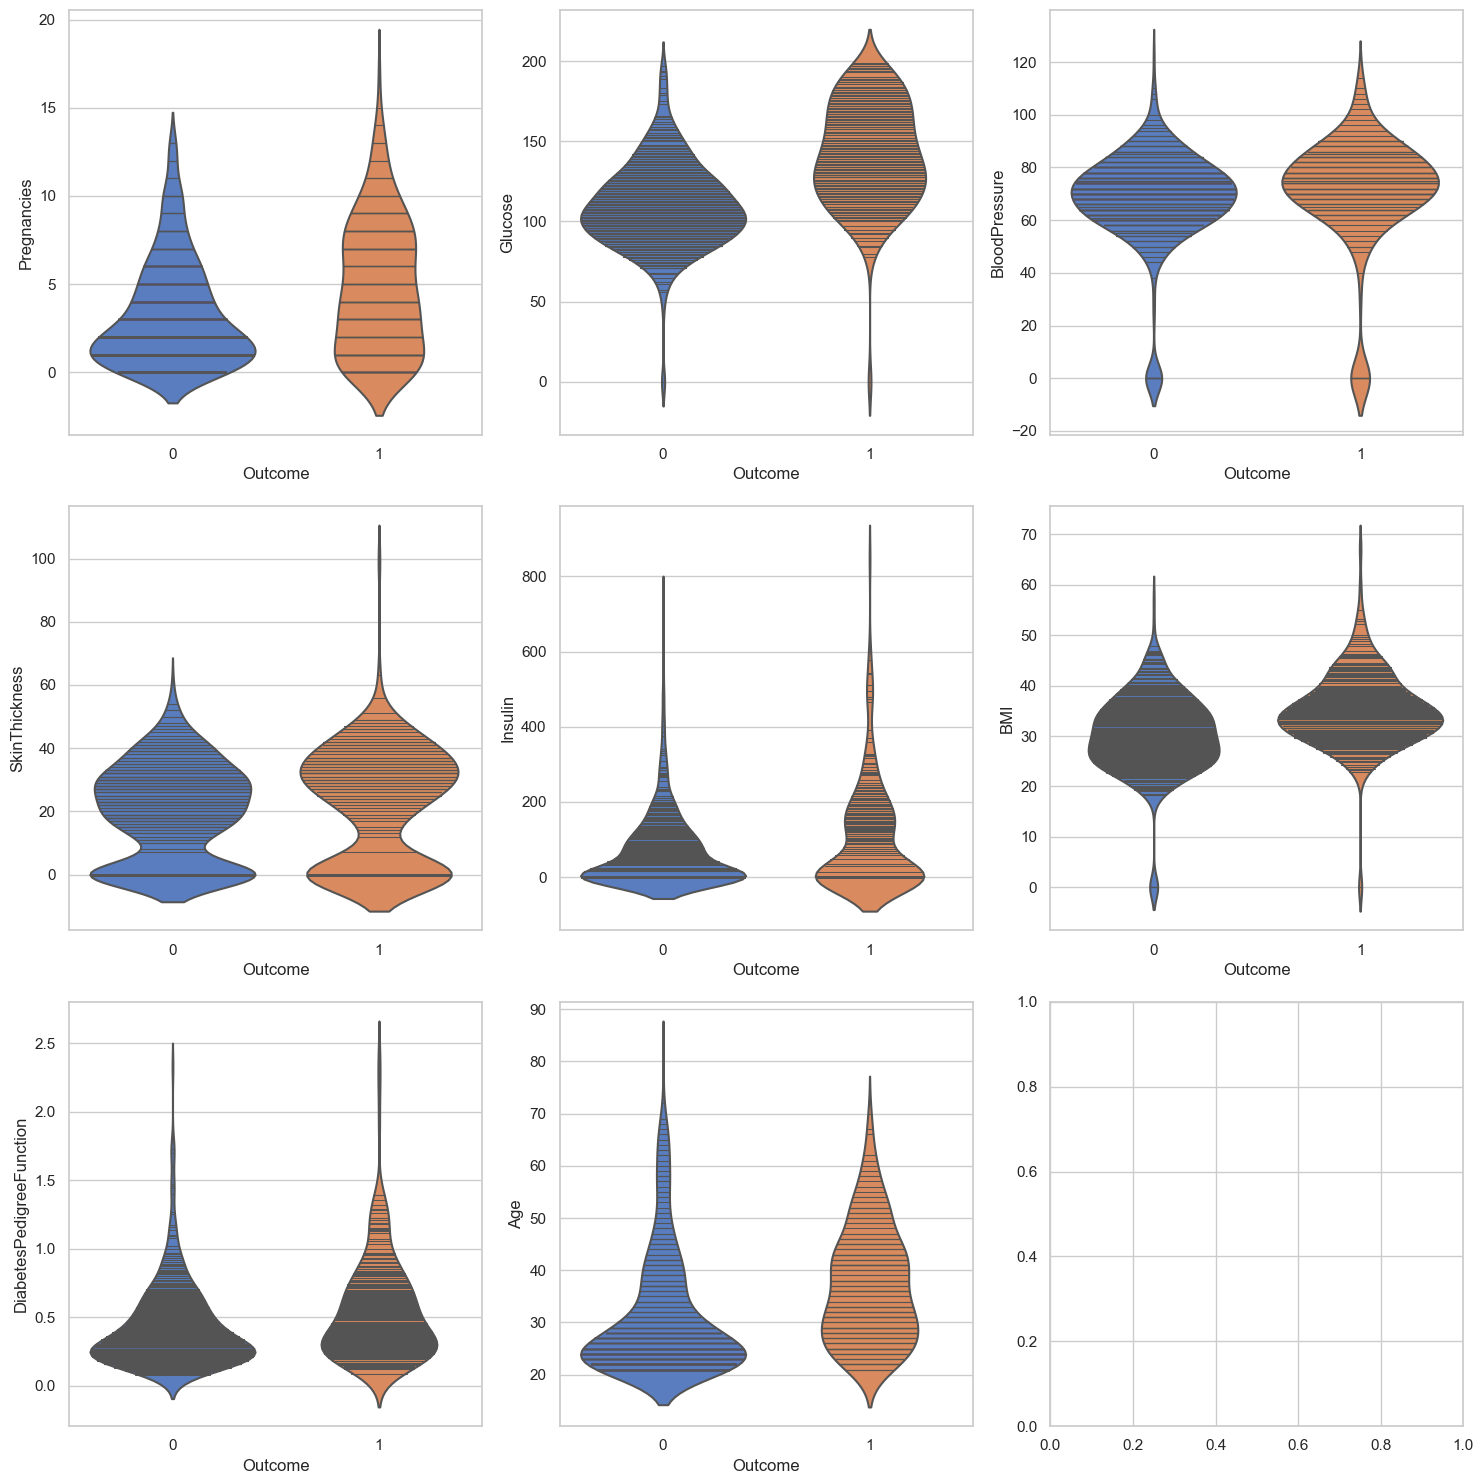

In [44]:
# 畫出提琴圖
sns.set(style="whitegrid", palette="muted")
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

for i, var in enumerate(num_cols[:-1]):
    row = i // 3
    col = i % 3
    sns.violinplot(x="Outcome", y=var, data=adata, ax=axs[row][col], split=True, inner="stick")
    
plt.tight_layout()
plt.show()

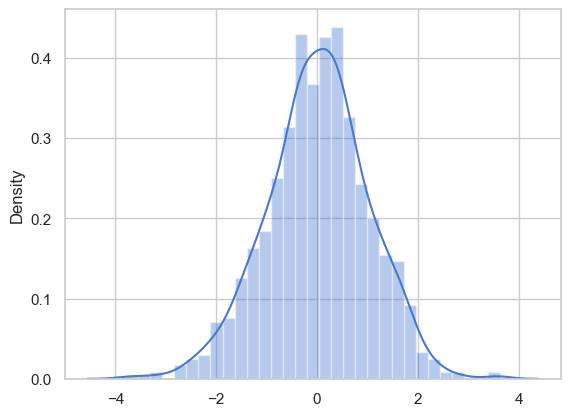

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from current font.
  fig.canvas.print_figure(bytes_

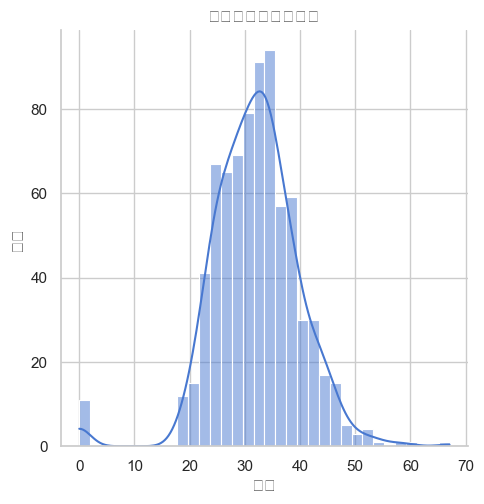

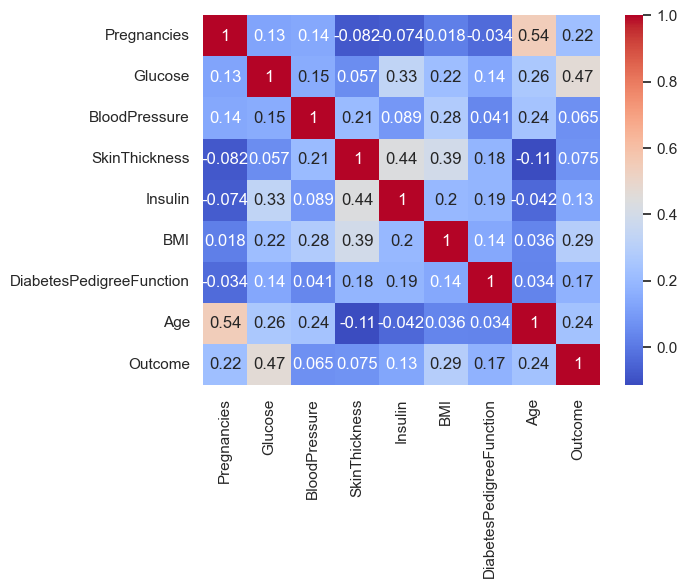

In [108]:
#畫出熱力圖

import seaborn as sns
import matplotlib.pyplot as plt

# 計算相關係數矩陣
corr_matrix = adata.corr()

# 繪製熱力圖
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# 顯示圖形
plt.show()

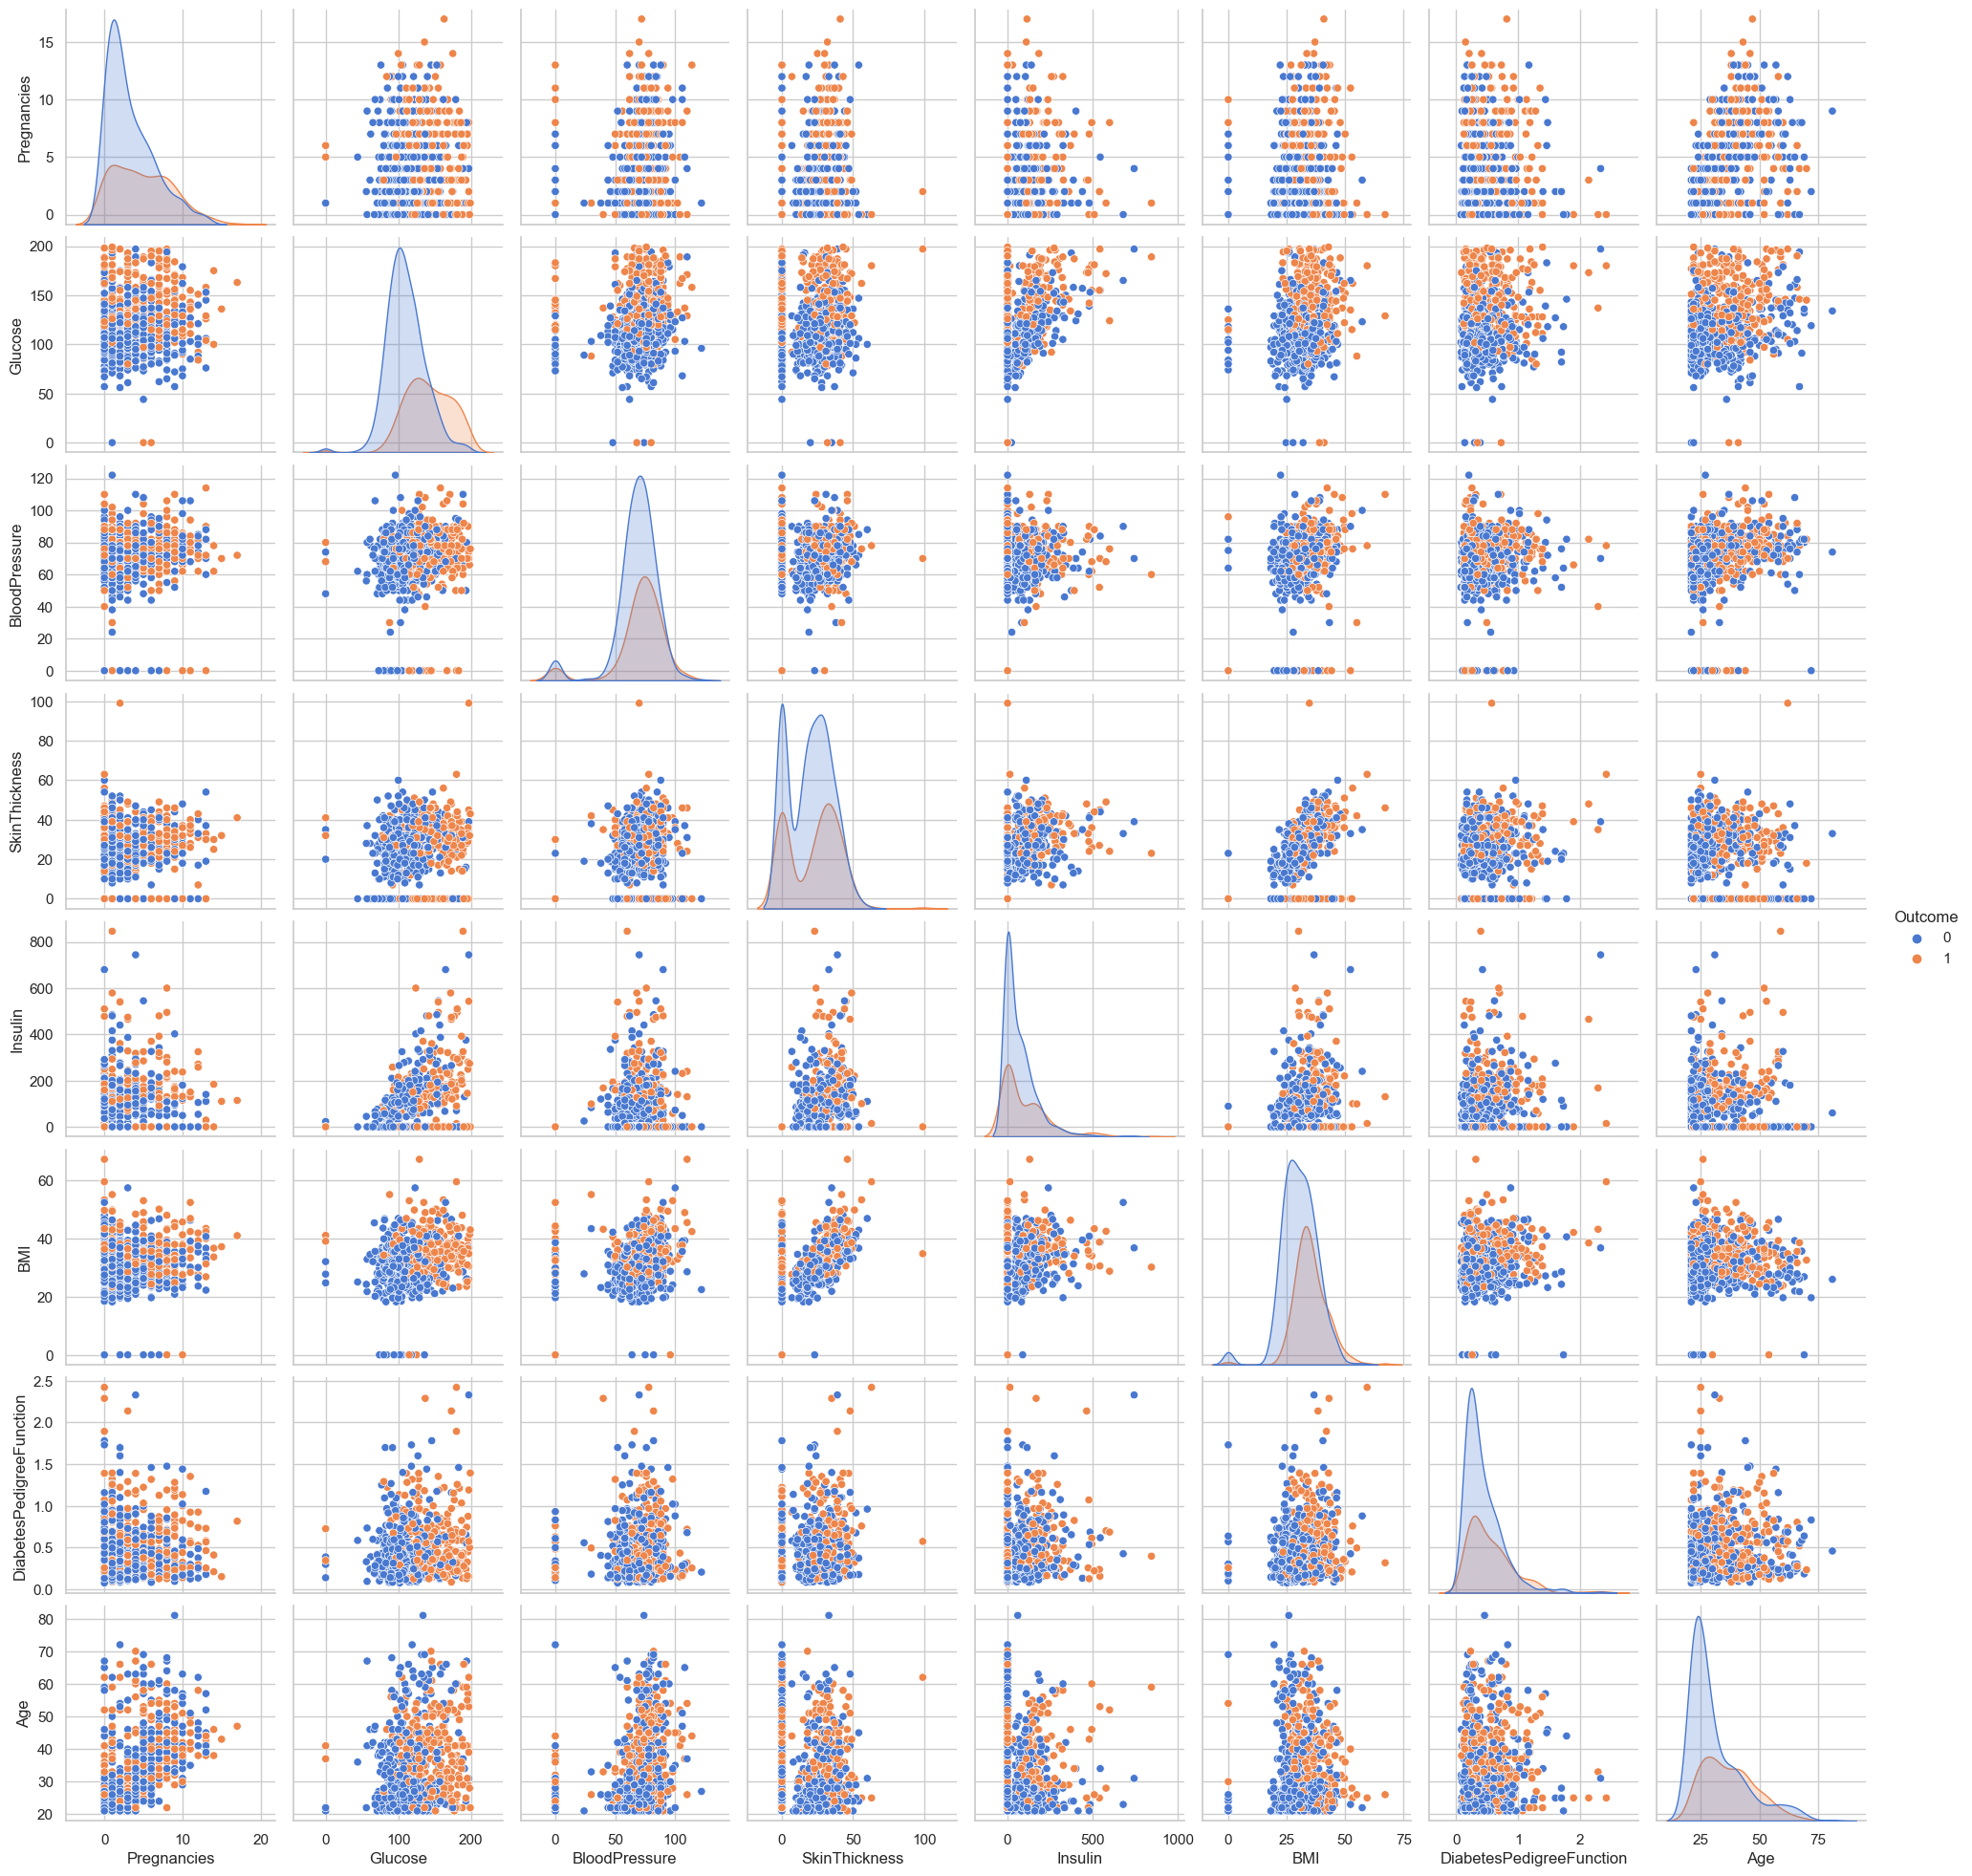

In [105]:


sns.pairplot(adata, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome')
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = adata.drop('Outcome', axis=1)
y = adata['Outcome']

# 定义逻辑回归模型與迭代次數為1000次
lr = LogisticRegression(max_iter=1000)

# 执行10折交叉验证
scores = cross_val_score(lr, X, y, cv=10)

# 输出交叉验证得分
print('Cross-validation scores:', scores)

Cross-validation scores: [0.72727273 0.77922078 0.80519481 0.71428571 0.75324675 0.76623377
 0.80519481 0.80519481 0.75       0.82894737]


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = adata.drop('Outcome', axis=1)
y = adata['Outcome']

# 定义迭代次数的候选值
max_iters = [10,50,100,500,1000]

# 交叉验证并比较模型性能
best_score = 0
best_iter = 0
for max_iter in max_iters:
    # 定义逻辑回归模型
    lr = LogisticRegression(max_iter=max_iter)
    
    # 执行10折交叉验证
    scores = cross_val_score(lr, X, y, cv=10)
    
    # 计算平均交叉验证得分
    mean_score = scores.mean()
    
    # 比较得分并记录最佳模型
    if mean_score > best_score:
        best_score = mean_score
        best_iter = max_iter

# 输出最佳模型的迭代次数和交叉验证得分
print('Best max_iter:', best_iter)
print('Best cross-validation score:', best_score)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best max_iter: 100
Best cross-validation score: 0.7747949419002051


In [109]:
#找出最適合的迭代次數

sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = adata.drop('Outcome', axis=1)
y = adata['Outcome']

# 定义迭代次数的候选值
max_iters = [60,70,80,90,100,110,120,130,140,150]

# 交叉验证并比较模型性能
best_score = 0
best_iter = 0
for max_iter in max_iters:
    # 定义逻辑回归模型
    lr = LogisticRegression(max_iter=max_iter)
    
    # 执行10折交叉验证
    scores = cross_val_score(lr, X, y, cv=10)
    
    # 计算平均交叉验证得分
    mean_score = scores.mean()
    
    # 比较得分并记录最佳模型
    if mean_score > best_score:
        best_score = mean_score
        best_iter = max_iter

# 输出最佳模型的迭代次数和交叉验证得分
print('Best max_iter:', best_iter)
print('Best cross-validation score:', best_score)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best max_iter: 130
Best cross-validation score: 0.7760765550239235


In [ ]:
#找出最適合的迭代次數

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 定义特征矩阵和目标变量
X = adata.drop('Outcome', axis=1)
y = adata['Outcome']

# 定义迭代次数的候选值
max_iters = [125,126,127,128,129,130,131,132,133,134,135]

# 交叉验证并比较模型性能
best_score = 0
best_iter = 0
for max_iter in max_iters:
    # 定义逻辑回归模型
    lr = LogisticRegression(max_iter=max_iter)
    
    # 执行10折交叉验证
    scores = cross_val_score(lr, X, y, cv=10)
    
    # 计算平均交叉验证得分
    mean_score = scores.mean()
    
    # 比较得分并记录最佳模型
    if mean_score > best_score:
        best_score = mean_score
        best_iter = max_iter

# 输出最佳模型的迭代次数和交叉验证得分
print('Best max_iter:', best_iter)
print('Best cross-validation score:', best_score)



In [73]:
def load_data():
    # 加載數據和標籤的程式碼
    # ...
    return X, y


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加載數據和標籤
X, y = load_data()

# 切分數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建隨機森林分類器
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 計算模型準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7467532467532467


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 生成随机数据集
X, y = make_regression(n_samples=1000, n_features=10, noise=10)

# 定义模型
model = LinearRegression()

# 计算模型的平均偏差和平均方差
def bias_variance(model, X, y, n_runs=100, test_size=0.2):
    
    # 初始化变量
    error = np.zeros(n_runs)
    bias = np.zeros(n_runs)
    variance = np.zeros(n_runs)
    
    # 进行多次实验
    for i in range(n_runs):
        
        # 切分数据集
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=i)
        
        # 训练模型并预测测试集结果
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # 计算测试误差
        error[i] = mean_squared_error(y_test, y_pred)
        
        # 计算模型的偏差和方差
        y_pred_train = model.predict(X_train)
        bias[i] = np.mean((y_train - y_pred_train) ** 2)
        variance[i] = np.var(y_pred_train)
    
    # 计算平均偏差和平均方差
    avg_error = np.mean(error)
    avg_bias = np.mean(bias)
    avg_var = np.mean(variance)
    
    # 输出结果
    print("平均测试误差: {:.4f}".format(avg_error))
    print("平均偏差: {:.4f}".format(avg_bias))
    print("平均方差: {:.4f}".format(avg_var))

# 计算bias-variance
bias_variance(model, X, y)

平均测试误差: 103.6772
平均偏差: 101.8386
平均方差: 42239.5380


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 將資料分為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(adata[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']], adata['Outcome'], test_size=0.2, random_state=42)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 用測試集評估模型
score = model.score(X_test, y_test)

# 輸出模型評估結果
print("模型評估結果: {:.2f}".format(score))